In [863]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg
import numpy as np
from sklearn.linear_model import ElasticNetCV, ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LassoCV
import warnings
warnings.simplefilter('ignore')
from sklearn import (linear_model, metrics, neural_network, pipeline, preprocessing, model_selection)
import seaborn as sns
sns.set()
import datetime as dt
from statsmodels.tsa.stattools import grangercausalitytests

In [864]:
dset = pd.read_csv('TSLA_ds_1022.csv')
dset = dset.drop(0)
dset = dset.set_index("Date")
dset.head()

,TSLA,10CMR,FFR,infexp,TWD,10YBE,oil,XAU,XAG,BTC,...,ETH_diff,BNB_diff,ADA_diff,Tether_diff,XRP_diff,SOL_diff,pDOTn_diff,USDC_diff,DOGE_diff,const
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-05,44.69,2.25,0.36,1.81,114.2649,1.56,35.97,1077.66,13.98,431.8,...,0.0,0.0,0.0,0.0,2.0000,0.0,0.0,0.0,0.0,1
2016-01-06,43.81,2.18,0.36,1.80,114.6177,1.53,33.97,1094.45,14.01,428.0,...,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,1
2016-01-07,43.13,2.16,0.36,1.75,114.6517,1.50,33.29,1109.25,14.31,459.0,...,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,1
2016-01-08,42.20,2.13,0.36,1.73,115.0097,1.48,33.20,1104.24,13.95,454.0,...,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,1
2016-01-11,41.57,2.17,0.36,1.71,115.0141,1.45,31.42,1094.26,13.86,449.3,...,0.0,0.0,0.0,0.0,24.6883,0.0,0.0,0.0,0.0,1


In [865]:
maxlag=10
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

In [870]:
Granger = dset.loc[:, "TSLA_diff":"DOGE_diff"]
grangers_causation_matrix(Granger, variables = Granger.columns)

,TSLA_diff_x,10CMR_diff_x,FFR_diff_x,infexp_diff_x,TWD_diff_x,10YBE_diff_x,oil_diff_x,XAU_diff_x,XAG_diff_x,BTC_diff_x,ETH_diff_x,BNB_diff_x,ADA_diff_x,Tether_diff_x,XRP_diff_x,SOL_diff_x,pDOTn_diff_x,USDC_diff_x,DOGE_diff_x
TSLA_diff_y,1.0000,0.6571,0.1963,0.4127,0.2082,0.1380,0.8005,0.0007,0.0096,0.6192,0.4485,0.9632,0.5514,0.9211,0.3492,0.8981,0.7859,0.8515,0.8469
10CMR_diff_y,0.0091,1.0000,0.0000,0.0000,0.0010,0.0000,0.0063,0.0000,0.0001,0.0000,0.0002,0.2052,0.0001,0.6290,0.0214,0.1545,0.0431,0.7412,0.4359
FFR_diff_y,0.0879,0.0000,1.0000,0.0000,0.0000,0.0000,0.0005,0.0000,0.0000,0.0000,0.0000,0.4487,0.0000,0.9813,0.0001,0.5253,0.8308,0.8973,0.8941
infexp_diff_y,0.4964,0.0000,0.0000,1.0000,0.0002,0.0000,0.0000,0.0067,0.0000,0.0000,0.0000,0.3346,0.0000,0.0065,0.1274,0.3326,0.5260,0.4813,0.6607
TWD_diff_y,0.4741,0.0009,0.0000,0.0000,1.0000,0.0000,0.2020,0.0000,0.0000,0.0007,0.0000,0.6265,0.0104,0.3737,0.3939,0.6338,0.3210,0.2664,0.8202
10YBE_diff_y,0.7924,0.0000,0.0000,0.0000,0.0154,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.7873,0.0000,0.8048,0.0012,0.4042,0.3702,0.5009,0.8122
oil_diff_y,0.6599,0.0000,0.0107,0.0000,0.0259,0.0000,1.0000,0.0001,0.2883,0.4544,0.3266,0.6329,0.7146,0.9673,0.5308,0.9539,0.7794,0.8809,0.9600
XAU_diff_y,0.0261,0.0000,0.0000,0.0390,0.5379,0.0000,0.0409,1.0000,0.0050,0.0009,0.0118,0.1037,0.3502,0.5957,0.5645,0.4666,0.7449,0.4006,0.8543
XAG_diff_y,0.3175,0.0000,0.0082,0.0337,0.1683,0.0000,0.5411,0.0126,1.0000,0.0051,0.0107,0.5948,0.0260,0.4045,0.4021,0.0001,0.3679,0.6546,0.4319
BTC_diff_y,0.7210,0.0136,0.0491,0.3187,0.0040,0.0734,0.4174,0.0213,0.1035,1.0000,0.0116,0.2759,0.0452,0.6021,0.0607,0.1768,0.5764,0.4664,0.7431


10CMR_diff     0.014131
FFR_diff       0.092686
infexp_diff    0.087457
TWD_diff      -1.309505
10YBE_diff     0.015982
oil_diff      -0.011928
XAU_diff      -1.087257
XAG_diff       0.463873
BTC_diff       0.020326
ETH_diff       0.017720
BNB_diff      -0.004339
ADA_diff       0.013301
Tether_diff   -0.002773
XRP_diff      -0.020046
SOL_diff       0.026030
pDOTn_diff     0.036460
USDC_diff      0.026032
DOGE_diff      0.000118
dtype: float64


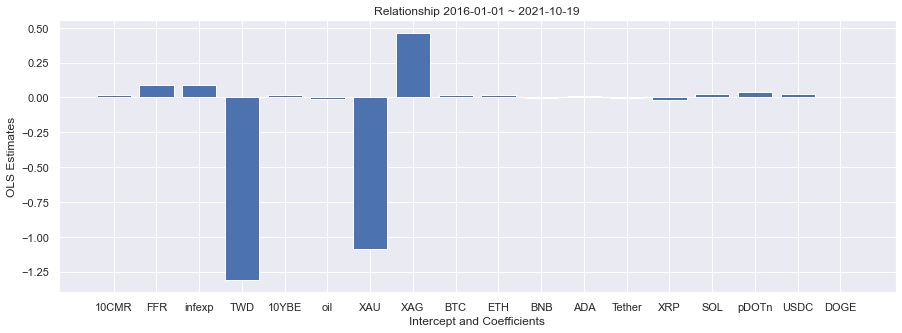

In [913]:
TSLA = dset["TSLA_diff"]
Exogen = dset.loc[:, "10CMR_diff":"DOGE_diff"]
TSLA_OLS = sm.OLS(TSLA, Exogen)
result_OLS = TSLA_OLS.fit()

names = dset.columns.values[1:19]
plt.figure(figsize=(15,5))
plt.bar(names,result_OLS.params[0:])
plt.title('Relationship 2016-01-01 ~ 2021-10-19')
plt.xlabel('Intercept and Coefficients')
plt.ylabel('OLS Estimates');
print(result_OLS.params[0:])

[ 0.          0.05427374  0.         -0.          0.         -0.
 -0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.        ]


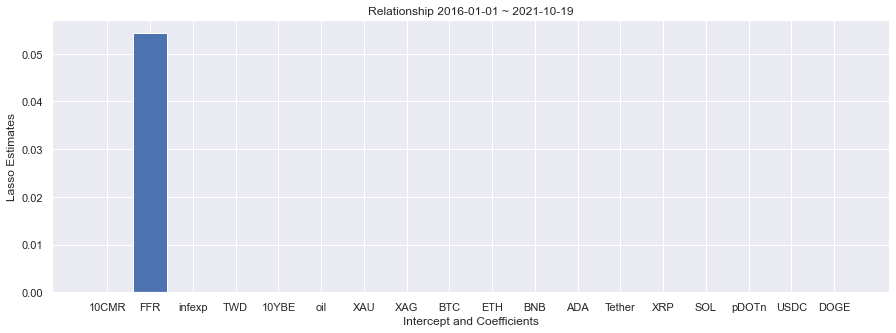

In [914]:
TSLA_EN = LassoCV(cv=10, random_state=1)
TSLA_EN.fit(Exogen, TSLA)

plt.figure(figsize=(15,5))
plt.bar(names, TSLA_EN.coef_)
plt.title('Relationship 2016-01-01 ~ 2021-10-19')
plt.xlabel('Intercept and Coefficients')
plt.ylabel('Lasso Estimates');
print(TSLA_EN.coef_)

10CMR_diff     0.080909
FFR_diff       0.018976
infexp_diff   -0.210880
TWD_diff      -1.256933
10YBE_diff     0.298315
oil_diff      -0.006214
XAU_diff      -0.544770
XAG_diff       0.468780
BTC_diff       0.009931
ETH_diff       0.021716
BNB_diff      -0.005463
ADA_diff      -0.009273
Tether_diff    0.006178
XRP_diff       0.017648
SOL_diff       0.021012
pDOTn_diff     0.026336
USDC_diff      0.027537
DOGE_diff      0.000150
dtype: float64


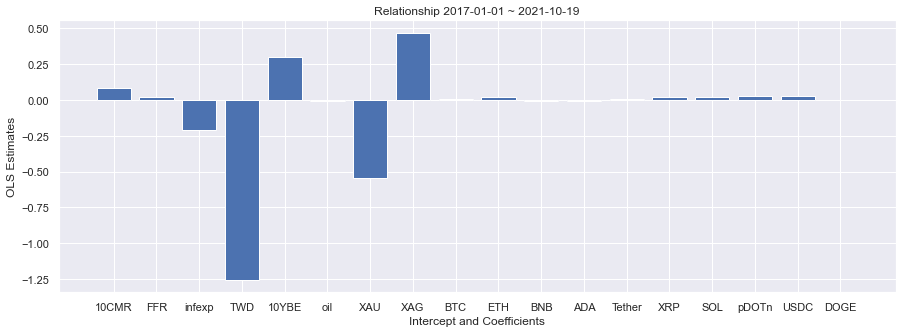

In [915]:
TSLA = dset.loc["2017-01-01": ,"TSLA_diff"]
Exogen = dset.loc["2017-01-01": , "10CMR_diff":"DOGE_diff"]
TSLA_OLS = sm.OLS(TSLA, Exogen)
result_OLS = TSLA_OLS.fit()

names = dset.columns.values[1:19]
plt.figure(figsize=(15,5))
plt.bar(names,result_OLS.params[0:])
plt.title('Relationship 2017-01-01 ~ 2021-10-19')
plt.xlabel('Intercept and Coefficients')
plt.ylabel('OLS Estimates');
print(result_OLS.params[0:])

[ 0.04315125  0.03434962  0.         -0.          0.06338159 -0.00461966
  0.          0.05125903  0.          0.02463747 -0.          0.
  0.          0.0127104   0.02291635  0.00664378  0.          0.00013601]


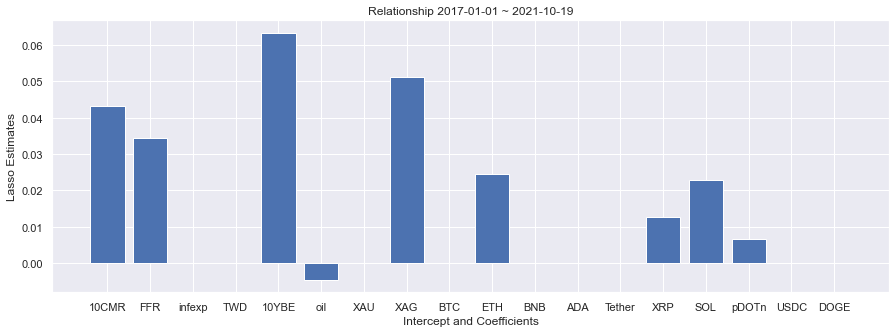

In [916]:
TSLA_EN = LassoCV(cv=10, random_state=1)
TSLA_EN.fit(Exogen, TSLA)

plt.figure(figsize=(15,5))
plt.bar(names, TSLA_EN.coef_)
plt.title('Relationship 2017-01-01 ~ 2021-10-19')
plt.xlabel('Intercept and Coefficients')
plt.ylabel('Lasso Estimates');
print(TSLA_EN.coef_)

10CMR_diff     0.068849
FFR_diff       0.017995
infexp_diff   -0.398306
TWD_diff      -2.191456
10YBE_diff     0.380097
oil_diff      -0.006267
XAU_diff      -0.312150
XAG_diff       0.398949
BTC_diff       0.071159
ETH_diff       0.036119
BNB_diff      -0.023011
ADA_diff      -0.021280
Tether_diff    3.290954
XRP_diff       0.046905
SOL_diff       0.012452
pDOTn_diff     0.000428
USDC_diff      2.495569
DOGE_diff      0.000170
dtype: float64


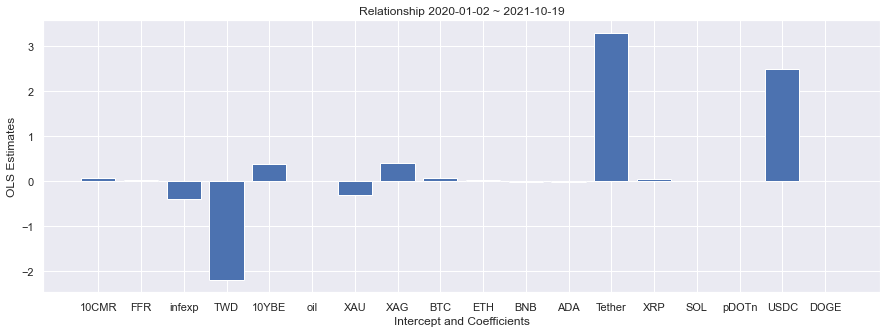

In [917]:
TSLA = dset.loc["2020-01-02": ,"TSLA_diff"]
Exogen = dset.loc["2020-01-02": , "10CMR_diff":"DOGE_diff"]
TSLA_OLS = sm.OLS(TSLA, Exogen)
result_OLS = TSLA_OLS.fit()

names = dset.columns.values[1:19]
plt.figure(figsize=(15,5))
plt.bar(names,result_OLS.params[0:])
plt.title('Relationship 2020-01-02 ~ 2021-10-19')
plt.xlabel('Intercept and Coefficients')
plt.ylabel('OLS Estimates');
print(result_OLS.params[0:])

[ 0.00260532  0.04136176  0.         -0.          0.00862294 -0.00686096
  0.          0.          0.00785282  0.07127208 -0.          0.
  0.          0.03075644  0.01217944  0.         -0.          0.00015222]


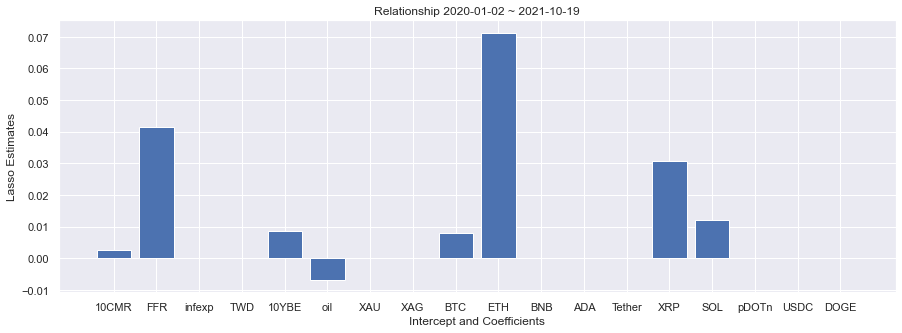

In [918]:
TSLA_EN = LassoCV(cv=10, random_state=1)
TSLA_EN.fit(Exogen, TSLA)

plt.figure(figsize=(15,5))
plt.bar(names, TSLA_EN.coef_)
plt.title('Relationship 2020-01-02 ~ 2021-10-19')
plt.xlabel('Intercept and Coefficients')
plt.ylabel('Lasso Estimates');
print(TSLA_EN.coef_)

In [877]:
"""alphas = [0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1]
for a in alphas:
    model = ElasticNet(alpha=a).fit(Exogen,TSLA)   
    score = model.score(Exogen,TSLA)
    pred_y = model.predict(Exogen)
    mse = mean_squared_error(TSLA, pred_y)
    print("Alpha:{0:.4f}, R2:{1:.2f}, MSE:{2:.2f}, RMSE:{3:.2f}"
       .format(a, score, mse, np.sqrt(mse))) """

'alphas = [0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1]\nfor a in alphas:\n    model = ElasticNet(alpha=a).fit(Exogen,TSLA)   \n    score = model.score(Exogen,TSLA)\n    pred_y = model.predict(Exogen)\n    mse = mean_squared_error(TSLA, pred_y)\n    print("Alpha:{0:.4f}, R2:{1:.2f}, MSE:{2:.2f}, RMSE:{3:.2f}"\n       .format(a, score, mse, np.sqrt(mse))) '

In [878]:
from statsmodels.tsa.vector_ar.var_model import VAR

In [879]:
dset1 = pd.read_csv('TSLA_ds_1022.csv')
dset1 = dset1.drop(0)
dset1 = dset1.set_index("Date")
names1 = ["TSLA_diff", "10CMR_diff", "FFR_diff", "infexp_diff", "TWD_diff", "10YBE_diff",\
          "oil_diff", "XAU_diff", "XAG_diff", "BTC_diff", "ETH_diff", "BNB_diff",\
          "ADA_diff", "Tether_diff", "XRP_diff", "SOL_diff", "pDOTn_diff", "USDC_diff", "DOGE_diff"]
names2 = ["10CMR_diff", "FFR_diff", "infexp_diff", "TWD_diff", "10YBE_diff",\
          "oil_diff", "XAU_diff", "XAG_diff", "BTC_diff", "ETH_diff", "BNB_diff",\
          "ADA_diff", "Tether_diff", "XRP_diff", "SOL_diff", "pDOTn_diff", "USDC_diff", "DOGE_diff"]

dset2 = dset1.loc[:,names1]
#data_t = dset2.loc["2016-01-04":"2021-06-21", :]

#col_mask=dset2.isnull().any(axis=0) 
#row_mask=dset2.isnull().any(axis=1)
#print(dset2.loc[row_mask,col_mask])

#dset2.fillna(dset2.mean(), inplace=True)
#dset2 = dset2.fillna(dset2.mean())
#dset2._is_view

In [910]:
start_date = "2021-06-21"
end_date = "2021-10-19"

dset2.index.names = ["Date"]
dset2.index = pd.to_datetime(dset.index)
dset2.to_period("D")

data_train = dset2.loc["2016-01-05":"2021-06-21", :]
var_train = VAR(data_train)
results = var_train.fit(25)
lag_order = results.k_ar
forecasted = pd.DataFrame(results.forecast(data_train.values[-lag_order:], 120)) # Forecast 120 months


# Rename forecasted columns
forecasted_names = list(forecasted.columns.values)
data_train_names = list(data_train.columns.values)

var_dict = dict(zip(forecasted_names, data_train_names))
for f,t in var_dict.items():
    forecasted = forecasted.rename(columns={f:t + "_fcast"})
    
forecasted.index= pd.DatetimeIndex(pd.date_range(start_date, periods=forecasted.shape[0]))
forecasted.index.names = ["Date"]

# Parse together forecasted data with original dataset
final_data = pd.merge(forecasted, dset2, left_index=True, right_index=True)
final_data = final_data.sort_index(axis=0, ascending=True)
final_data = pd.concat([data_train, final_data], sort=True, axis=0)
final_data = final_data.sort_index(axis=0, ascending=True)

TSLA_fs = final_data.loc["2021-06-22":"2021-10-18","TSLA_diff_fcast"]
TSLA_r = final_data.loc["2021-06-22":"2021-10-18","TSLA_diff"]

print(TSLA_fs)
var_mse1 = metrics.mean_squared_error(TSLA_fs, TSLA_r)

Date
2021-06-22    0.101006
2021-06-23    5.433423
2021-06-24   -7.929520
2021-06-25    0.569414
2021-06-28    2.115058
                ...   
2021-10-12   -0.075105
2021-10-13    0.118774
2021-10-14    0.335843
2021-10-15   -0.108588
2021-10-18    0.121682
Name: TSLA_diff_fcast, Length: 83, dtype: float64


In [911]:
print(f"The mean squared error between the forecasted and actual values is {var_mse1}")

The mean squared error between the forecasted and actual values is 17.311018428934627


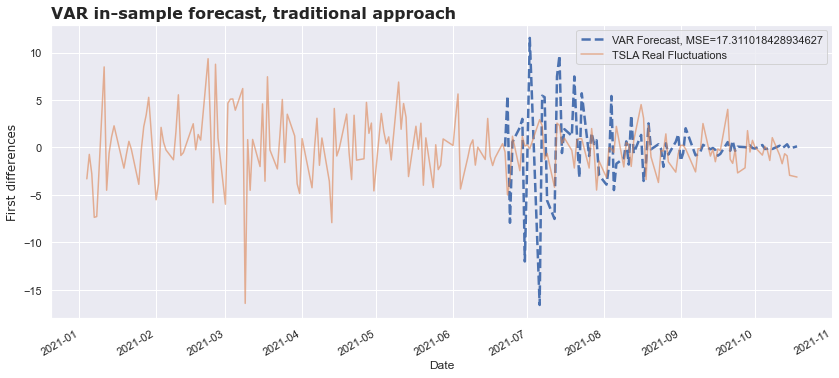

In [912]:
fig, ax = plt.subplots(figsize=(14,6))
colors = sns.color_palette("deep", 8)

TSLA_rplot = final_data.loc["2021-01-02":"2021-10-18","TSLA_diff"]

TSLA_fs.plot(ax=ax, legend=True, linewidth=2.5, linestyle="dashed")
TSLA_rplot.plot(ax=ax, legend=True, alpha=0.6, linestyle="solid")

ax.set_title("VAR in-sample forecast, traditional approach", fontsize=16, fontweight="bold", fontname="Verdana", loc="left")
ax.set_ylabel("First differences", fontname="Verdana")
ax.legend([f"VAR Forecast, MSE={var_mse1}", "TSLA Real Fluctuations"])

In [899]:
def train_test_plot(model, X_train, X_test):
    """
    This will plot the actual values of CPI against the one fitted by the model
    We train the model until 2009 and then use it from 2009 onwards on the test features dataset
    """
    fig, ax = plt.subplots(figsize=(12,4))
    colors = sns.color_palette("deep", 8)
    
    yvalues = pd.DataFrame(y_test)
    
    forecasted = list(model.predict(X_test)) # Use the model fit on features data from 2009 onwards
    df_fcast = pd.DataFrame({"date": list(yvalues.index), "TSLA_fcast": forecasted})
    df_fcast = df_fcast.set_index("date")
    
    df = pd.merge(yvalues, df_fcast, left_index=True, right_index=True)

    df["TSLA_fcast"].plot(ax=ax, legend=True, linewidth=2.5, linestyle="dashed", color="forestgreen") # TSLA fitted
    df["TSLA_diff"].plot(ax=ax, legend=True, linewidth=1.5, linestyle="solid", color="salmon") # Actual TSLA values
    
    ax.set_title("TSLA vs. Model's TSLA")
    ax.set_ylabel("First differences")
    ax.legend(["Fitted TSLA","Actual TSLA"])

In [900]:
x_train = dset2.loc["2020-01-05":"2021-06-21", names2]
x_test = dset2.loc["2021-06-21":,names2]
y_train = dset2.loc["2020-01-05":"2021-06-21", "TSLA_diff"]
y_test = dset2.loc["2021-06-21":, "TSLA_diff"]

lasso = linear_model.LassoCV(cv=model_selection.TimeSeriesSplit(n_splits=5), 
                             alphas=None, tol = 10000, normalize=True) 

fred_lasso = lasso.fit(x_train, y_train)
optimal_alpha = fred_lasso.alpha_

lasso2 = linear_model.Lasso(alpha=optimal_alpha, normalize=True)
lasso2.fit(x_train, y_train)

lasso2.coef_
#train_test_plot(dset_EN, x_train, x_test) 

array([ 7.20902440e-02,  2.00701734e-02, -4.02847424e-01, -2.21122815e+00,
        3.77903319e-01, -6.91098494e-03, -3.34285652e-01,  4.24181205e-01,
        8.54914242e-02,  3.52091625e-02, -2.50758876e-02, -3.56472136e-02,
        3.52150559e+00,  6.06896275e-02,  8.61617708e-03,  7.33200359e-03,
        3.14226828e+00,  2.28882758e-04])

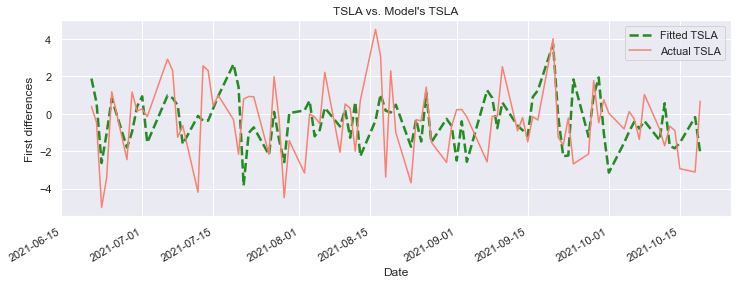

In [901]:
fig, ax = plt.subplots(figsize=(12,4))
colors = sns.color_palette("deep", 8)

yvalues = pd.DataFrame(y_test)
    
forecasted = list(lasso2.predict(x_test)) # Use the model fit on features data from 2009 onwards
df_fcast = pd.DataFrame({"date": list(yvalues.index), "TSLA_fcast": forecasted})
df_fcast = df_fcast.set_index("date")
    
df = pd.merge(yvalues, df_fcast, left_index=True, right_index=True)


df["TSLA_fcast"].plot(ax=ax, legend=True, linewidth=2.5, linestyle="dashed", color="forestgreen") # TSLA fitted
df["TSLA_diff"].plot(ax=ax, legend=True, linewidth=1.5, linestyle="solid", color="salmon") # Actual TSLA values
    
ax.set_title("TSLA vs. Model's TSLA")
ax.set_ylabel("First differences")
ax.legend(["Fitted TSLA","Actual TSLA"])

In [902]:
metrics.mean_squared_error(y_test, dset_EN.predict(x_test))

3.8741380753790273

In [903]:
lasso_coefs = pd.DataFrame({"features":list(x_train), "coef": lasso2.coef_})
lasso_coefs = lasso_coefs[lasso_coefs.coef != 0.0]
lasso_coefs.sort_values("coef", ascending=False)

,features,coef
12,Tether_diff,3.521506
16,USDC_diff,3.142268
7,XAG_diff,0.424181
4,10YBE_diff,0.377903
8,BTC_diff,0.085491
0,10CMR_diff,0.072090
13,XRP_diff,0.060690
9,ETH_diff,0.035209
1,FFR_diff,0.020070
14,SOL_diff,0.008616


In [904]:
names3 = ["TSLA_diff","FFR_diff", "ETH_diff", "XRP_diff",\
          "10YBE_diff", "BTC_diff", "SOL_diff"]
dset3 = dset1.loc[:,names3]
#mse2, df2 = var_create(columns=names, data=dset)
#print(f"The mean squared error between the forecasted and actual values is {mse2}")

In [905]:
start_date = "2021-06-21"
end_date = "2021-10-19"

dset3.index.names = ["Date"]
dset3.index = pd.to_datetime(dset.index)
dset3.to_period("D")

data_train = dset3.loc["2020-01-02":"2021-06-21", :]
var_train = VAR(data_train)
results = var_train.fit(25)
lag_order = results.k_ar
forecasted = pd.DataFrame(results.forecast(data_train.values[-lag_order:], 120)) # Forecast 120 months

# Rename forecasted columns
forecasted_names = list(forecasted.columns.values)
data_train_names = list(data_train.columns.values)

var_dict = dict(zip(forecasted_names, data_train_names))
for f,t in var_dict.items():
    forecasted = forecasted.rename(columns={f:t + "_fcast"})
    
forecasted.index= pd.DatetimeIndex(pd.date_range(start_date, periods=forecasted.shape[0]))
forecasted.index.names = ["Date"]

# Parse together forecasted data with original dataset
final_data = pd.merge(forecasted, dset3, left_index=True, right_index=True)
final_data = final_data.sort_index(axis=0, ascending=True)
final_data = pd.concat([data_train, final_data], sort=True, axis=0)
final_data = final_data.sort_index(axis=0, ascending=True)

TSLA_fs = final_data.loc["2021-06-22":"2021-10-18","TSLA_diff_fcast"]
TSLA_r = final_data.loc["2021-06-22":"2021-10-18","TSLA_diff"]

print(TSLA_fs)
var_mse2 = metrics.mean_squared_error(TSLA_fs, TSLA_r)

Date
2021-06-22     9.055724
2021-06-23    12.795725
2021-06-24     0.255226
2021-06-25    -4.068157
2021-06-28    -1.563721
                ...    
2021-10-12    -0.436792
2021-10-13     0.067200
2021-10-14    -0.005382
2021-10-15     0.128331
2021-10-18    -0.751468
Name: TSLA_diff_fcast, Length: 83, dtype: float64


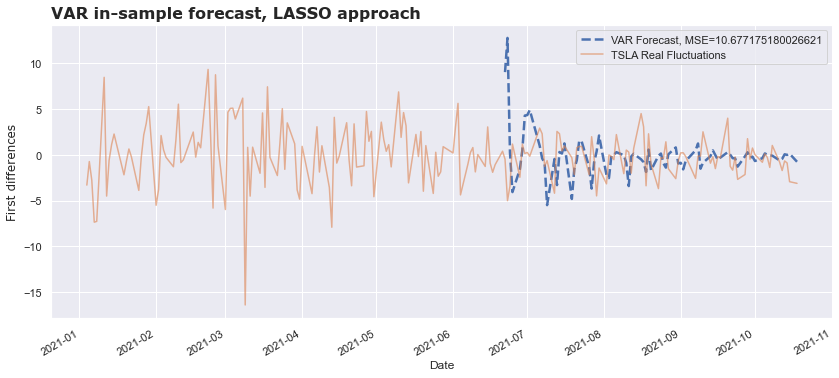

In [906]:
fig, ax = plt.subplots(figsize=(14,6))
colors = sns.color_palette("deep", 8)

TSLA_rplot = final_data.loc["2021-01-02":"2021-10-18","TSLA_diff"]

TSLA_fs.plot(ax=ax, legend=True, linewidth=2.5, linestyle="dashed")
TSLA_rplot.plot(ax=ax, legend=True, alpha=0.6, linestyle="solid")

ax.set_title("VAR in-sample forecast, LASSO approach", fontsize=16, fontweight="bold", fontname="Verdana", loc="left")
ax.set_ylabel("First differences", fontname="Verdana")
ax.legend([f"VAR Forecast, MSE={var_mse2}", "TSLA Real Fluctuations"])